<a href="https://colab.research.google.com/github/BenjaminPhillips22/my-neural-network-playground/blob/master/Planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy    
from scipy.spatial import distance_matrix

from time import time
import imageio

from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import seaborn as sns
%matplotlib inline

from google.colab import files

In [0]:
def plot_art(planets):
    plt.cla()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Planets!', fontsize=30)
    ax.set_xlim(-1*WORLD_SIZE, WORLD_SIZE)
    ax.set_ylim(-1*WORLD_SIZE, WORLD_SIZE)
    
    num_planets = planets.shape[0]
    cmap = sns.color_palette('husl', n_colors=num_planets)  # a list of RGB tuples
    for p in range(num_planets):
        ax.scatter(planets[p, 0],
                   planets[p, 1],
                   color = cmap[p],
                   alpha=0.9,
                   s=planets[p, 6]*50
                  )
    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image



In [0]:
def update_pva(planets, planet_radii_pairs, dt=1):
    
    # update acc
    dist = np.maximum(dist_matrix(planets), planet_radii_pairs)
    G = GRAVITY
    num_planets = planets.shape[0]
    i = 0
    a_tot = G*planets[:, 6, np.newaxis]/np.power(dist, 3)
    x_acc_component = (planets[:, 0, np.newaxis] - np.transpose(planets[:, 0, np.newaxis])) * a_tot
    y_acc_component = (planets[:, 1, np.newaxis] - np.transpose(planets[:, 1, np.newaxis])) * a_tot
    x_acc_sum = np.nansum(x_acc_component, axis=0)
    y_acc_sum = np.nansum(y_acc_component, axis=0)

    # update x acc
    planets[:, 4] = x_acc_sum
    # update y acc
    planets[:, 5] = y_acc_sum
    
    # update x vel
    planets[:, 2] = planets[:, 2] + planets[:, 4] * dt
    # update y vel
    planets[:, 3] = planets[:, 3] + planets[:, 5] * dt
        
    # update x pos
    planets[:, 0] = planets[:, 0] + planets[:, 2] * dt
    # update y pos
    planets[:, 1] = planets[:, 1] + planets[:, 3] * dt
    
    # if position hits wall
    planets[:, 2] = np.array([vx*-1  if np.abs(x)>WORLD_SIZE else vx for x, vx in zip(planets[:, 0], planets[:, 2])])
    planets[:, 3] = np.array([vy*-1  if np.abs(y)>WORLD_SIZE else vy for y, vy in zip(planets[:, 1], planets[:, 3])])
    
    

def dist_matrix(planets):
    a = planets[:, 0:2]
    dist = distance_matrix(a, a)
    return dist


In [0]:
def non_random_planets(num_planets):
    planets = np.zeros((num_planets, 7))
    planets[:, 6] = np.ones(num_planets)
    
    # weight of one planet
    planets[0, 6] = 8
    
    planets[:, 0] = np.array([-2, 0, 2])*20
    planets[:, 1] = np.array([2, -2, 2])*20
    return planets

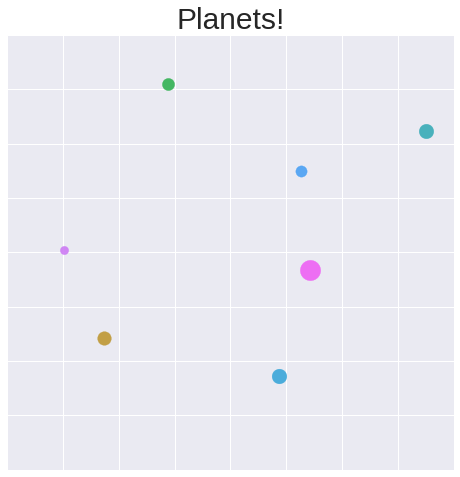

In [25]:
np.random.seed(19891)

GRAVITY = 20
WORLD_SIZE = 40

num_planets = 25
planets = 2*np.random.rand(num_planets, 7)-1
planets[:, 0:2] *= WORLD_SIZE*0.7
planets[:, 2:4] *= 3
planets[:, 4:6] *= 0
planets[:, 6] = np.random.gamma(2, 2, num_planets)*0.8
planets[0, 6] = 5
planets[0, 1:6] = 0
# planets = non_random_planets(num_planets)
planet_radii = np.power(3*planets[:, 6]/(4*np.pi), 1/3)[np.newaxis]
planet_radii_pairs = planet_radii + np.transpose(planet_radii)


fig, ax = plt.subplots(figsize=(8,8))
my_images = []

time_steps = 50

for t in range(time_steps):
    my_images.append(plot_art(planets))
    update_pva(planets, planet_radii_pairs, dt=2)
    

In [0]:
name = 'planets_' + str(time()) + '.gif'
imageio.mimsave(name, my_images, fps=10)
files.download(name)
